# Data Procssing for Digit Classification with MNIST Dataset in ANN

This document provides a detailed walkthrough of a Jupyter notebook that processes the MNIST dataset for digit classification. The notebook covers data loading, exploration, preprocessing, and saving the processed data for future use.

## Table of Contents
1. *Introduction*
2. *Data Loading*
3. *Data Exploration*
4. *Data Preprocessing : Normalizatipon + Flattening*
5. *One-Hot Encoding*
6. *Saving Processed Data*

---

## Introduction
The MNIST dataset is a collection of 70,000 handwritten digits (0-9) split into 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale pixel array. This notebook prepares the data for a machine learning model by:
- Loading the dataset
- Exploring sample images
- Normalizing pixel values
- Flattening the images
- One-hot encoding the labels
- Saving the processed data

---

## Data Loading
The notebook begins by importing necessary libraries and loading the MNIST dataset:

**Key points:**

 - Uses TensorFlow/Keras to load the built-in MNIST dataset

- Data is split into training (X_train, y_train) and testing (X_test, y_test) sets

- X contains image data in matrix forms, y contains labels (0-9)

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

# Data Exploration
- The notebook explores the dataset dimensions and visualizes sample images:

In [4]:
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)

60000
10000
(28, 28)


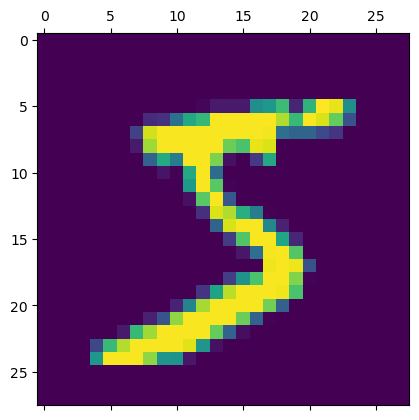

In [5]:
import matplotlib.pyplot as plt 
plt.matshow(X_train[0])

**Observations:**

- Training set contains 60,000 images

- Test set contains 10,000 images

- Each image is 28x28 pixels

- The first image shows a handwritten '5' (confirmed by y_train[0])

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

*Confirms that the label is '5' for the first sample in the training data*

# Data Preprocessing
*The notebook performs two key preprocessing steps:*

- **Normalization:** Scales pixel values from 0-255 to 0-1

In [8]:
X_train = X_train / 255
X_test = X_test / 255

X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
y_train[1]


0

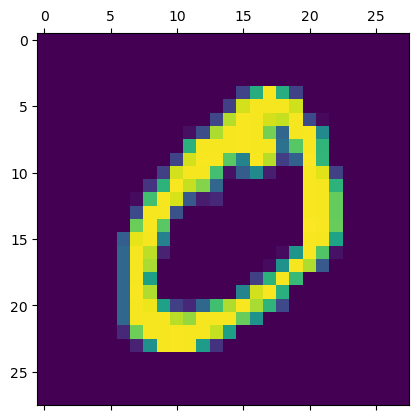

In [10]:
plt.matshow(X_train[1])

- **Flattening:** Converts 28x28 images to 784-dimensional vectors

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

*#flattend shape*

In [13]:
X_train_flattened[0].shape

(784,)

*While the shape was 28 by 28 previously, we stretch the matrix get an one dimensional array represenattion of digits with dimension = 784 (28 * 28)*
<br>**Why this matters:**

- Normalization helps models *converge faster*

- Flattening prepares the data for *fully connected layers*

# One-Hot Encoding
- The notebook converts labels to one-hot encoded format:

In [14]:
import numpy as np

y_df = pd.DataFrame(y_train.T, columns = ['digit_value'])

y_df_onehot = pd.DataFrame(0, index=y_df.index, columns=range(10))
for digit in y_df['digit_value'].unique():
    y_df_onehot[digit] = (y_df['digit_value'] == digit).astype(int)

y_train_onehot = np.array(y_df_onehot)
y_train_onehot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

*The above is an example output for label = '5'*
<br>**Benefits:**

- Converts categorical labels to binary matrix representation

- Required for many classification algorithms

# Saving Processed Data
- Finally, the notebook saves the processed data for future use:

In [18]:
np.save("C:\\ML and DS\\digit_clasification\\digit_classification_training_data.npy", X_train_flattened)
np.save("C:\\ML and DS\\digit_clasification\\digit_classification_training_labels.npy", y_train)
np.save("C:\\ML and DS\\digit_clasification\\digit_classification_training_labels_onehot.npy", y_train_onehot)
np.save("C:\\ML and DS\\digit_clasification\\digit_classification_testing_data.npy", X_test_flattened)
np.save("C:\\ML and DS\\digit_clasification\\digit_classification_testing_labels.npy", y_test)

**File structure:**

- Training data: 60,000 samples × 784 features

- Training labels: 60,000 samples × 10 classes (one-hot)

- Test data: 10,000 samples × 784 features

- Test labels: 10,000 samples (original format)

<br>**Different Files and their purposes:**
<br>- *digit_classification_training_data.npy* : For training
<br>- *digit_classification_training_labels.npy* : For checking training accuracy 
<br>- *digit_classification_training_labels_onehot.npy* : data for loss calculation during training
<br>- *digit_classification_testing_data.npy* : For testing our model
<br>- *digit_classification_testting_labels.npy* : For checking tarining accuracy
# Next Steps:
**This processed data can now be used to:**

- Train our machine learning model: single hidden layer neural network for digit classification

- Compare model performance

- Tune hyperparameters

- Deploy a digit classification system

